<a href="https://colab.research.google.com/github/lesterson563/Microphysics/blob/main/NeuralNetworkAuto100kpaperNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import loadtxt


In [ ]:
# This is a code to parameterize the autoconversion process using neural networks.. .
# This code works for Nc, Lc and Zc

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras

In [3]:
# load the training data (Text file with 4 columns, Nc, Qc, Zc and the Autonversion rate)
# Training data can be downloaded at: https://doi.org/10.5281/zenodo.10565705
# The training data is uploaded from your computer
from google.colab import files
uploaded = files.upload()

Saving Nc_Lwc_Zc_dZrautoKCE_100K.txt to Nc_Lwc_Zc_dZrautoKCE_100K.txt


In [4]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Nc_Lwc_Zc_dZrautoKCE_100K.txt']))

In [5]:
X=np.array(dataset)
#X
len(X)
X.shape

(100000, 4)

In [6]:
#Log transforming of the data...
Xtrain_full=np.log(X[:,0:3])
Ytrain2_full=np.log(X[:,3])

In [7]:
#Standardizing the data...
import sklearn
from sklearn import preprocessing
Xtrain_full_standard = preprocessing.scale(Xtrain_full)
Ytrain2_full_standard = preprocessing.scale(Ytrain2_full)



In [8]:
#Standardized validation and training files are obtained
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Xtrain_standard,Xvalid_standard,Ytrain2_standard,Yvalid2_standard = train_test_split(Xtrain_full_standard,Ytrain2_full_standard)

In [9]:
#Downloadind the data to a .csv file...
import pandas as pd
pd.DataFrame(Ytrain2_full_standard).to_csv("sample_data/filePrueba.csv")

In [11]:
import statistics
xmedia = statistics.mean(Xtrain_full_standard[:,0])
xmedia

6.396378598224479e-17

In [12]:
ymedia = statistics.mean(Ytrain2_standard)
ymedia

0.005134979527566754

In [14]:
ystd=np.std(Ytrain2_standard)
xstd=np.std(Xtrain_standard)

In [15]:
# Defining the neural network
model = keras.models.Sequential([
keras.layers.Dense(68,activation='relu',input_shape=Xtrain_standard.shape[1:]),
keras.layers.Dense(68,activation='relu'),
keras.layers.Dense(68,activation='relu'),
keras.layers.Dense(68,activation='relu'),
keras.layers.Dense(68,activation='relu'),
keras.layers.Dense(1)
])


In [16]:
# Importing libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [17]:
# Compiling the netowrk
model.compile(loss='mean_absolute_error',
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))


In [18]:
history = model.fit(Xtrain_standard, Ytrain2_standard, epochs=100,batch_size=32)

Epoch 1/100
2344/2344 [==============================] - 7s 2ms/step - loss: 0.0504
Epoch 2/100
2344/2344 [==============================] - 6s 3ms/step - loss: 0.0243
Epoch 3/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0207
Epoch 4/100
2344/2344 [==============================] - 6s 3ms/step - loss: 0.0202
Epoch 5/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0168
Epoch 6/100
2344/2344 [==============================] - 6s 3ms/step - loss: 0.0159
Epoch 7/100
2344/2344 [==============================] - 6s 2ms/step - loss: 0.0152
Epoch 8/100
2344/2344 [==============================] - 7s 3ms/step - loss: 0.0150
Epoch 9/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0140
Epoch 10/100
2344/2344 [==============================] - 6s 3ms/step - loss: 0.0132
Epoch 11/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.0130
Epoch 12/100
2344/2344 [==============================] - 6s 3ms/step - lo

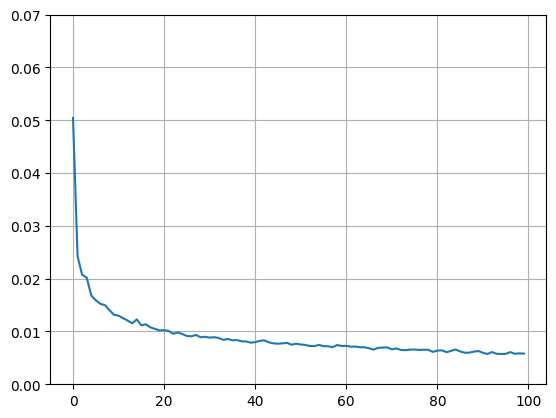

In [19]:
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.ylim([0,0.07])
plt.show()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                272       
                                                                 
 dense_1 (Dense)             (None, 68)                4692      
                                                                 
 dense_2 (Dense)             (None, 68)                4692      
                                                                 
 dense_3 (Dense)             (None, 68)                4692      
                                                                 
 dense_4 (Dense)             (None, 68)                4692      
                                                                 
 dense_5 (Dense)             (None, 1)                 69        
                                                                 
Total params: 19109 (74.64 KB)
Trainable params: 19109 (

In [21]:
print("Making a prediction!")
resultado = model.predict(Xvalid_standard)

Making a prediction!
782/782 [==============================] - 2s 2ms/step


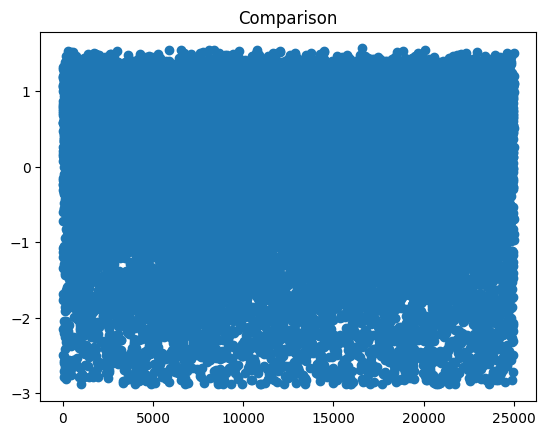

In [22]:
import numpy as np
from matplotlib import pyplot as plt
#plt.plot(Yvalid2_standard, resultado,'o')
plt.plot(Yvalid2_standard,'o')
plt.title("Comparison")
plt.show()

In [ ]:
resultado[100]

array([0.15127434], dtype=float32)

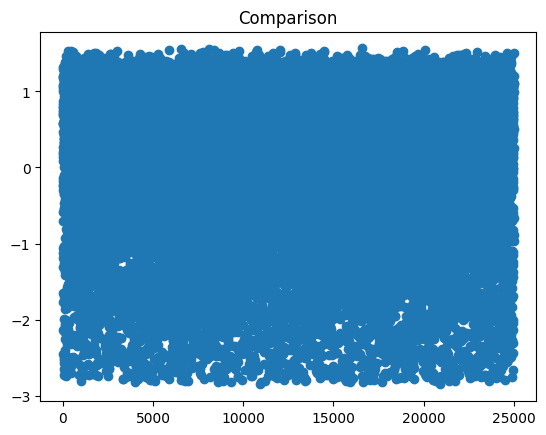

In [23]:
import numpy as np
from matplotlib import pyplot as plt
#plt.plot(Yvalid2_standard, resultado,'o')
plt.plot(resultado,'o')
plt.title("Comparison")
plt.show()

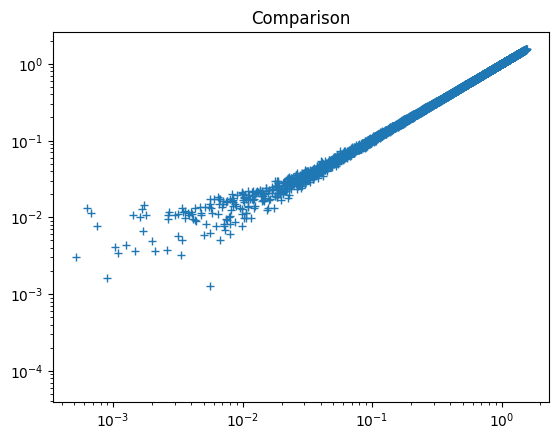

In [24]:
#plt.plot(Yvalid2_standard,resultado,'+')
# Comparison for normalized data (Validation vs neural network)
plt.loglog(Yvalid2_standard,resultado,'+')
plt.title("Comparison")
plt.show()

In [25]:
#We convert the normalized validation data Yvalid to non-normalized data
y2train_media = statistics.mean(Ytrain2_full)
y2train_media
y2train_std=np.std(Ytrain2_full)
y2train_std
# These are teh actual autoconversion rates...
actual_resultado=resultado*y2train_std+y2train_media
actual_autoconversion=Yvalid2_standard*y2train_std+y2train_media


In [26]:
#Calculamos el exponente para regresar a los datos originales
#import math
exp_actual_resultado=np.exp(actual_resultado)

In [27]:
actual_autoconversion
# We calculate the exponent to return to the original data
exp_actual_autoconversion=np.exp(actual_autoconversion)

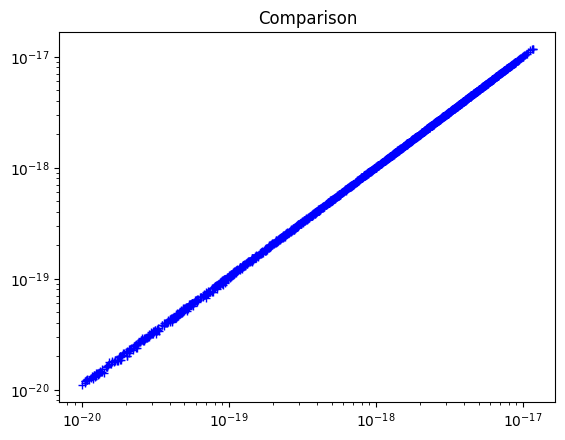

In [28]:
# Comparison, Neural network vs Validation data
from matplotlib import pyplot as plt
plt.loglog(exp_actual_autoconversion[::10],exp_actual_resultado[::10],'+',color='blue')
plt.title("Comparison")
plt.show()

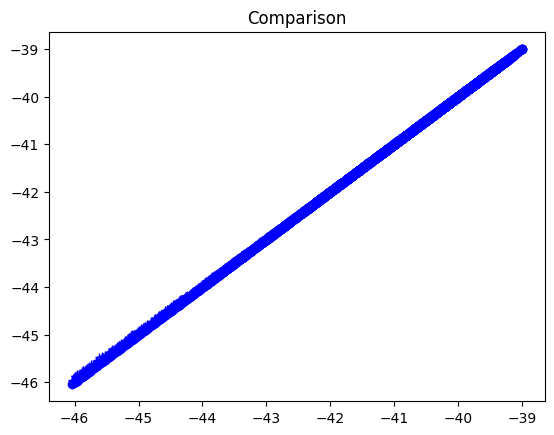

In [29]:
from matplotlib import pyplot as plt
plt.plot(actual_autoconversion[::10],actual_resultado[::10],'+',color='blue')
plt.plot(actual_autoconversion[::10],actual_autoconversion[::10],'o',color='blue')
plt.title("Comparison")
plt.show()

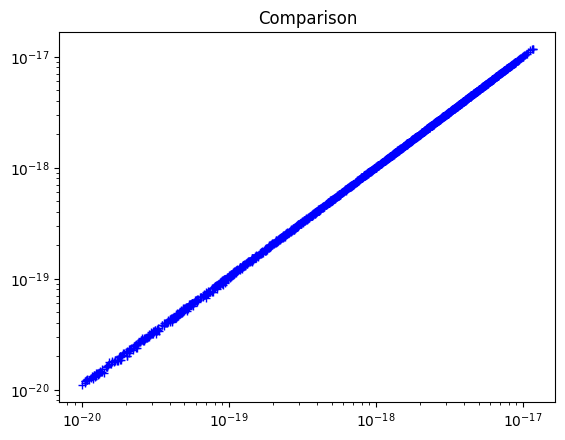

In [30]:
from matplotlib import pyplot as plt
plt.loglog(exp_actual_autoconversion[::10],exp_actual_resultado[::10],'+',color='blue')
plt.title("Comparison")
plt.show()